In [15]:
%load_ext autoreload
%autoreload 1
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from lpVirtualOR import LBP
import itertools
%aimport base 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#Create Cases
bounds = [(1,3),(2,4),(3,6)]
means = [int(np.ceil(sum(b)/2)) for b in bounds]
stds = [np.sqrt(((b[1] - b[0] + 1)**2 - 1)/12)for b in bounds]
types = range(len(bounds))
samplers = [lambda size,a=a,b=b: np.random.random_integers(a,b,size = size) for a,b in bounds]
sampler = base.Sampler(types,samplers)

In [48]:
cases = [0,1,1,2]

In [49]:
def check_K(K):
    N = len(K)
    if(K[0] != -1):
        return False
    for i in range(1,N):
        if(K[i] >= i):
            return False
    return True

In [74]:
D = 40
T = 8
beta = 1.5
gamma = 3
alpha = 10
step = 0.01
S = 2000
decimate = 100

Ks = []
for x in itertools.combinations_with_replacement(range(-1,len(cases)-1),len(cases)):
    if(check_K(x)):
        Ks.append(x)
        
WT = np.empty(len(Ks),dtype="object")
TC = np.empty(len(Ks),dtype="object")
WC = np.empty(len(Ks),dtype="object")
IC = np.empty(len(Ks),dtype="object")
OC = np.empty(len(Ks),dtype="object")
Cost = np.empty(len(Ks),dtype="object")

for i in range(len(Ks)):
    WT[i],TC[i],WC[i],IC[i],OC[i],Cost[i] = base.gradient_2_fixK(cases,Ks[i],sampler,step,alpha,beta,\
                                                                 gamma,D,T,S=S,decimate = decimate)

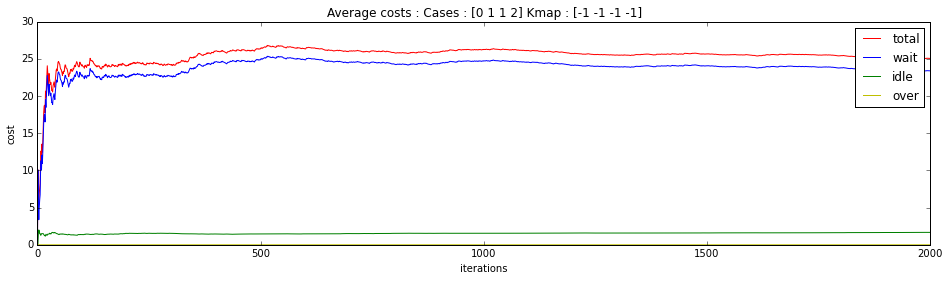

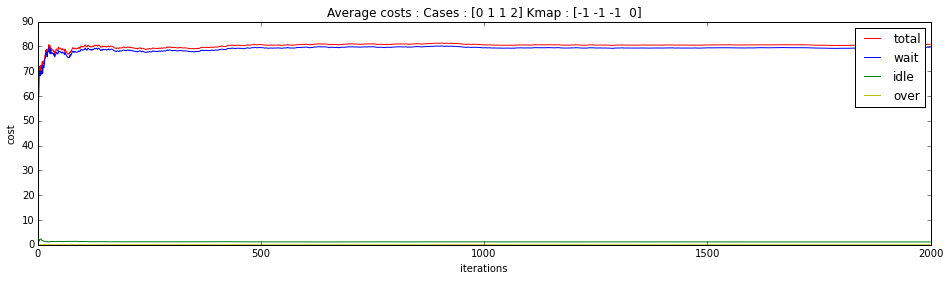

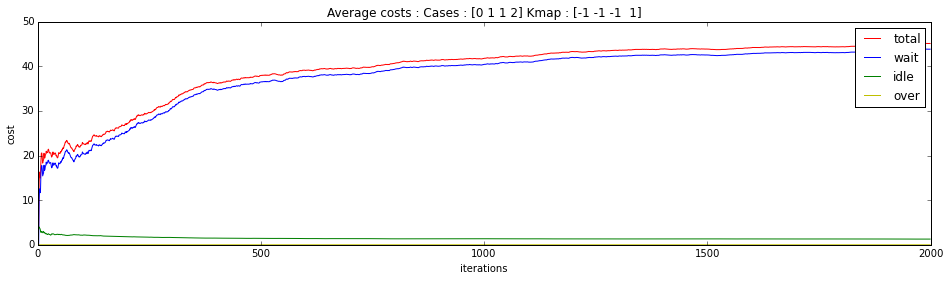

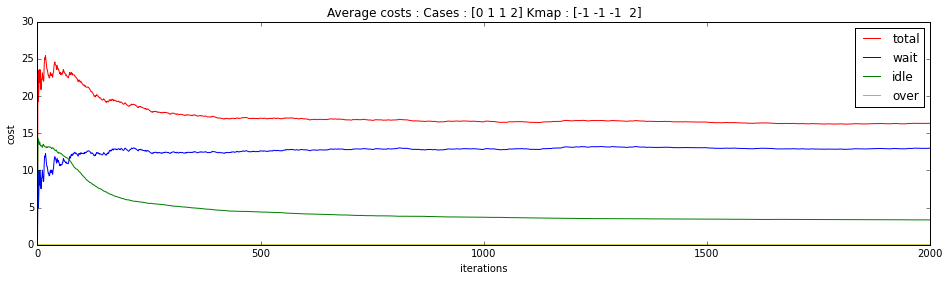

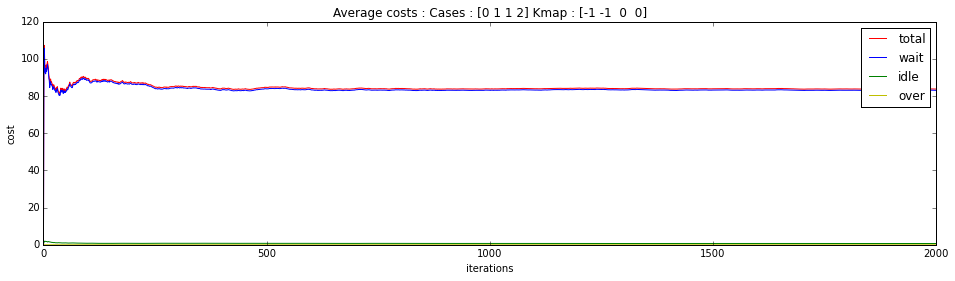

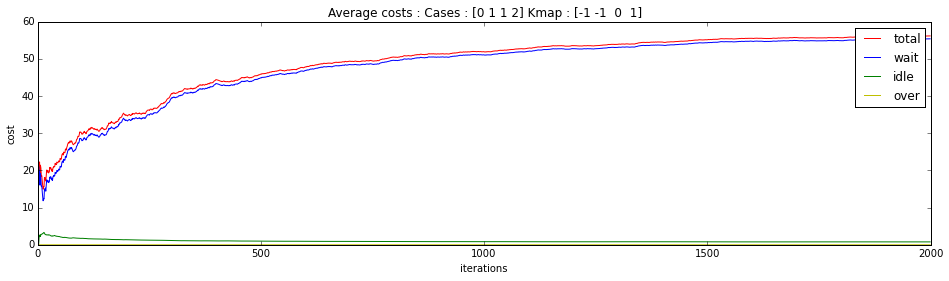

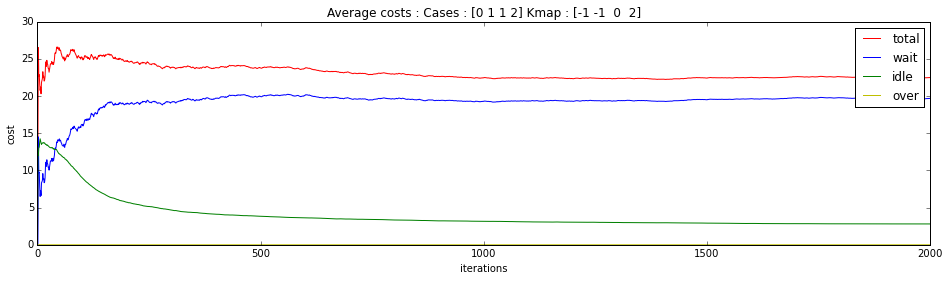

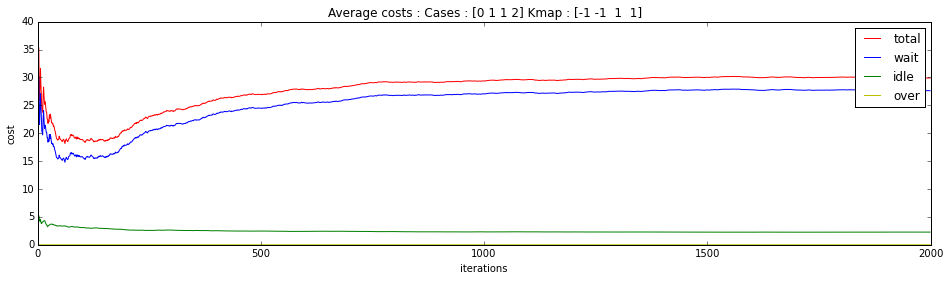

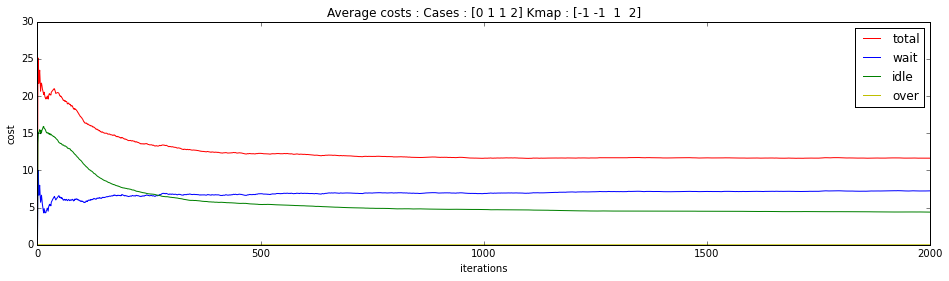

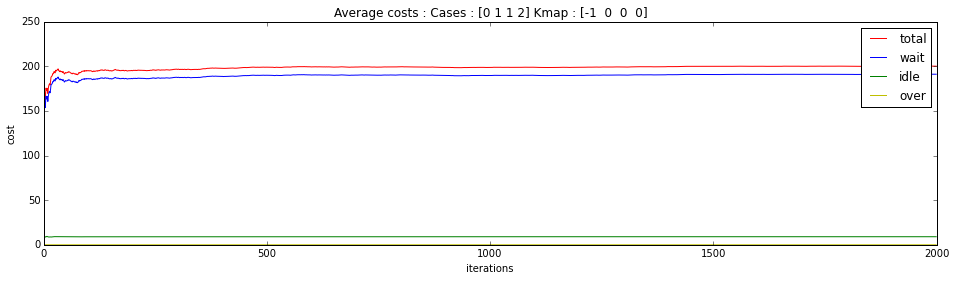

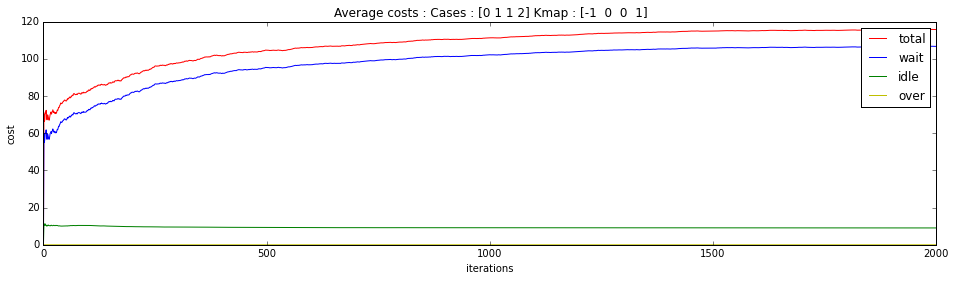

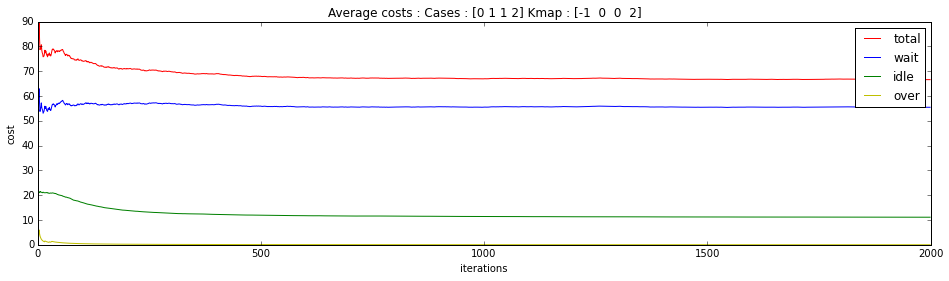

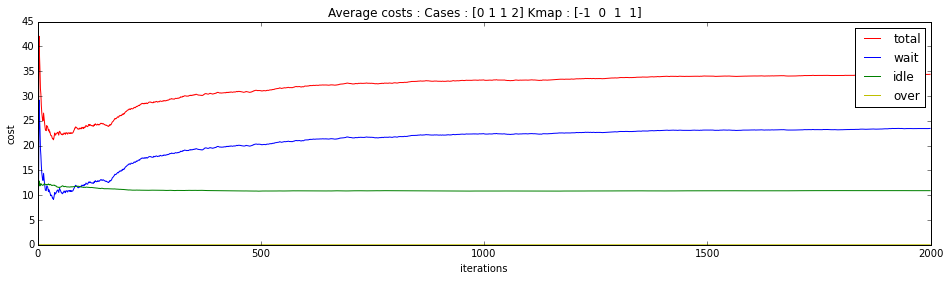

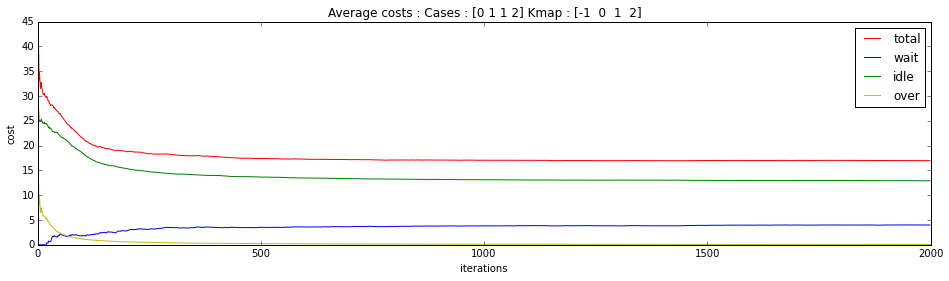

In [77]:
for i in range(len(Ks)):
    plt.figure(figsize=(16,4))
    plt.plot(TC[i],"r",label= "total")
    plt.plot(WC[i],"b",label= "wait")
    plt.plot(IC[i],"g",label = "idle")
    plt.plot(OC[i],"y",label = "over")
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("Average costs : " "Cases : " + np.array2string(np.array(cases)) + " Kmap : " + np.array2string(np.array(Ks[i])))
    plt.legend()
    plt.savefig("Convergance_Average.pdf")

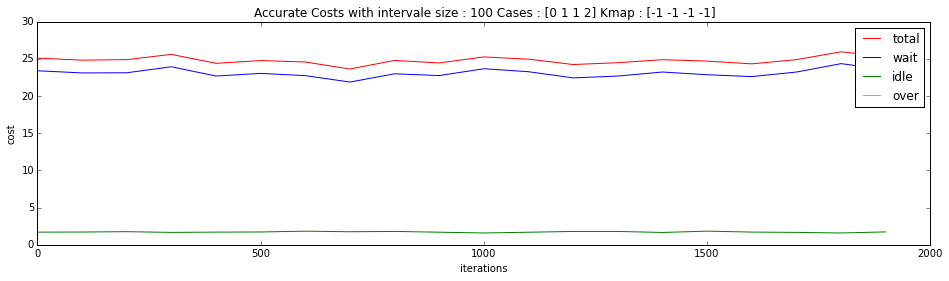

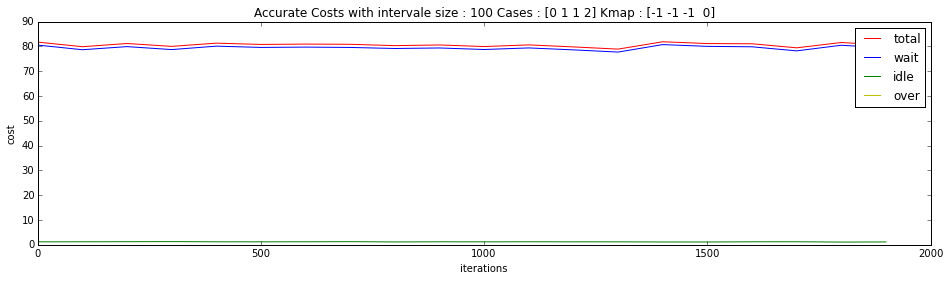

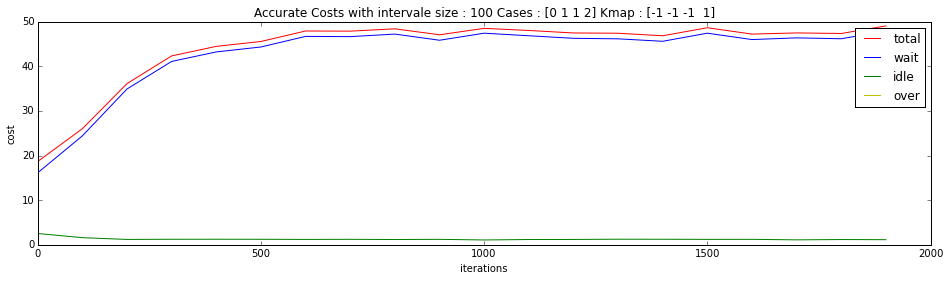

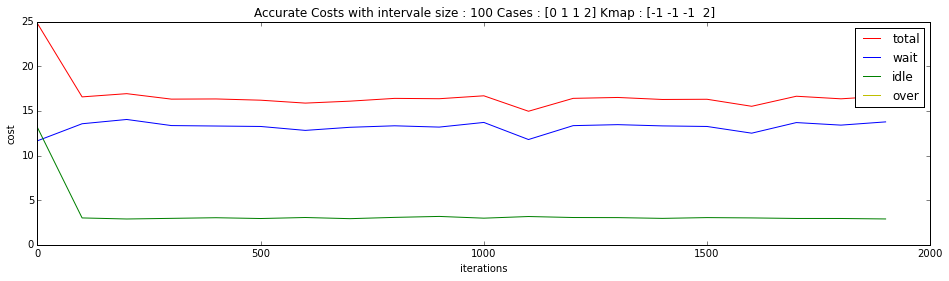

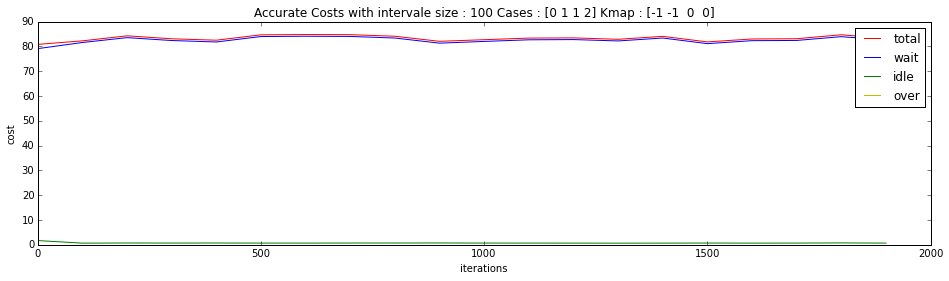

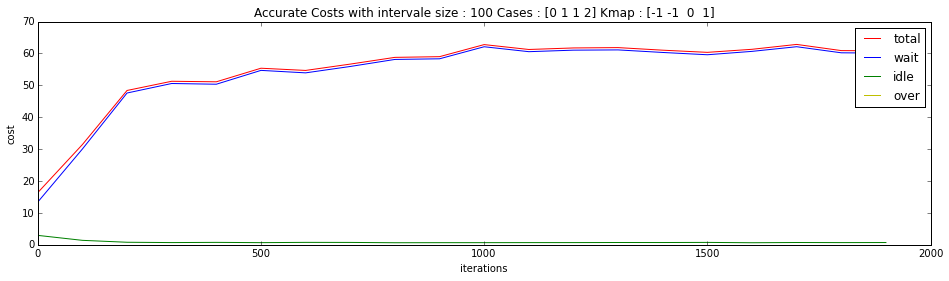

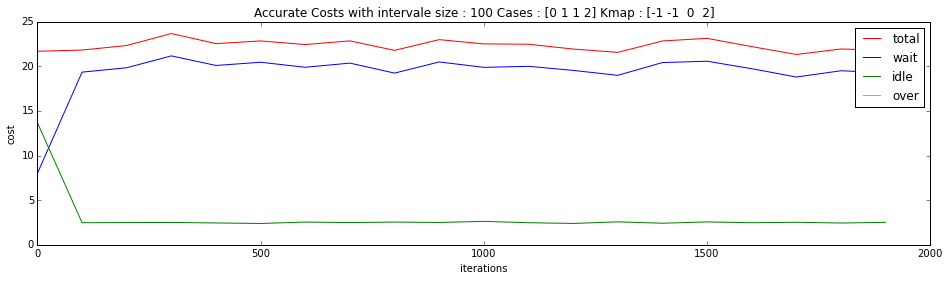

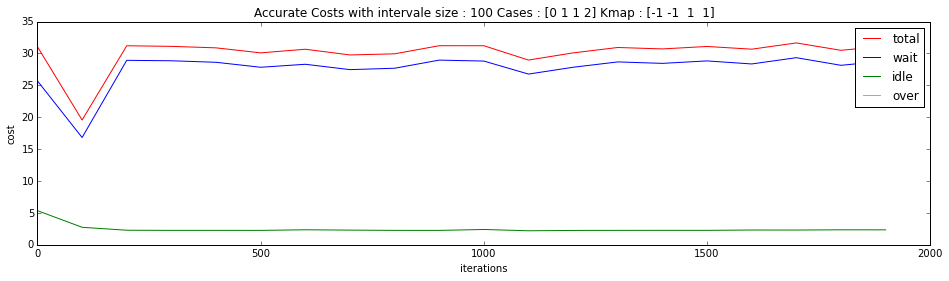

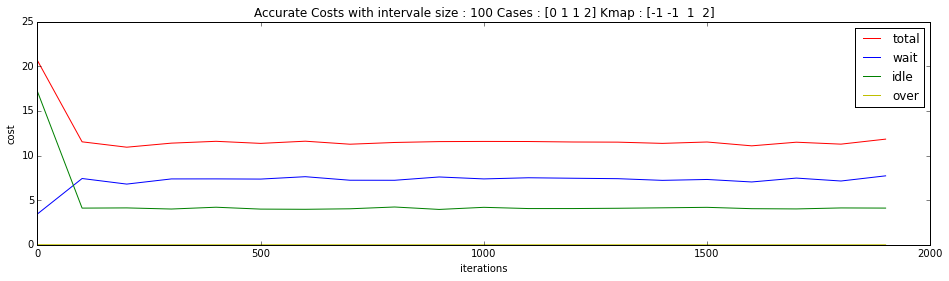

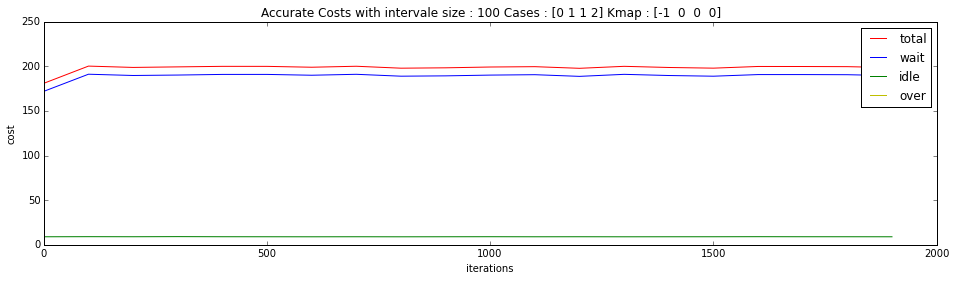

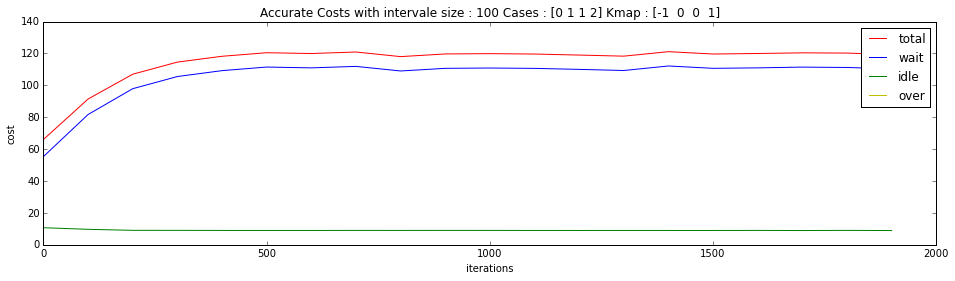

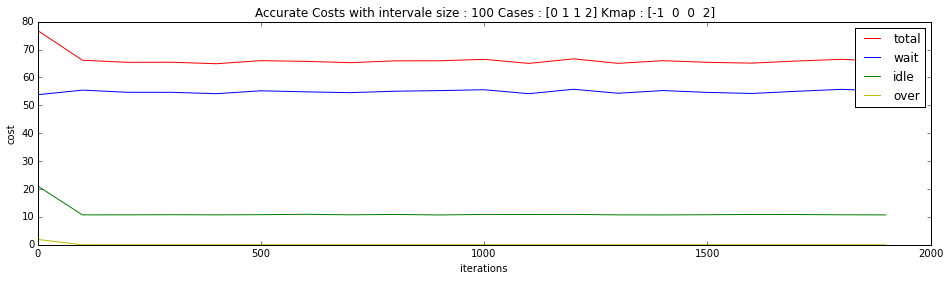

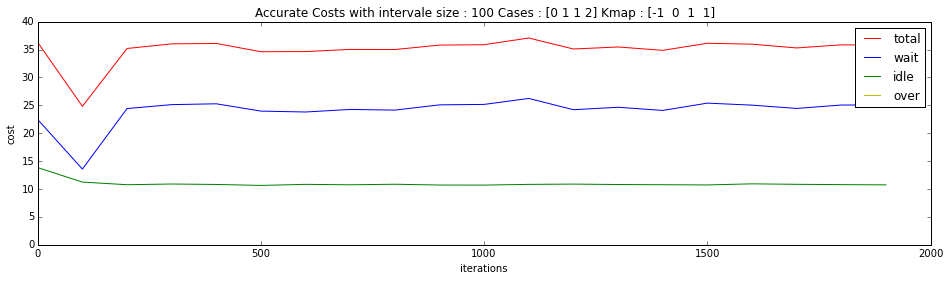

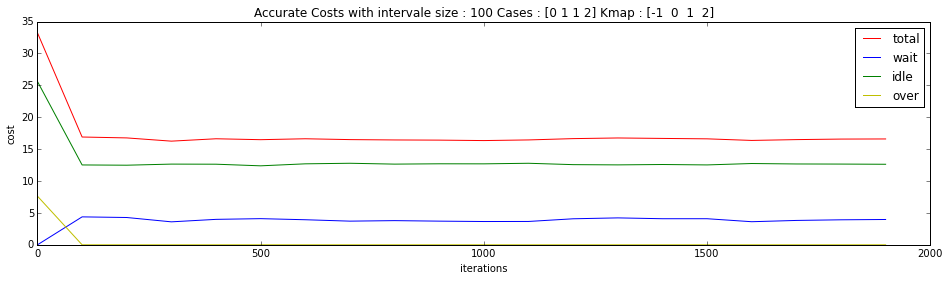

In [81]:
for i in range(len(Ks)):
    plt.figure(figsize=(16,4))
    iters = np.arange(S//decimate)*decimate
    plt.plot(iters,Cost[i][:,0],"r",label= "total")
    plt.plot(iters,Cost[i][:,1],"b",label= "wait")
    plt.plot(iters,Cost[i][:,2],"g",label = "idle")
    plt.plot(iters,Cost[i][:,3],"y",label = "over")
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("Accurate Costs with interval size : " + str(decimate) +" | Cases : " + \
              np.array2string(np.array(cases)) + "| Kmap : " + np.array2string(np.array(Ks[i])))
    plt.legend()
    plt.savefig("Convergance_Accurate.pdf")

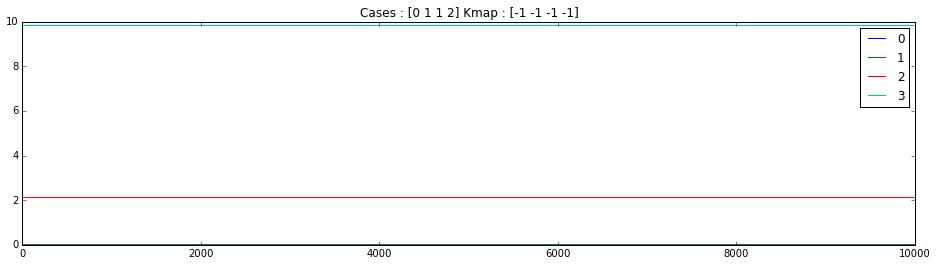

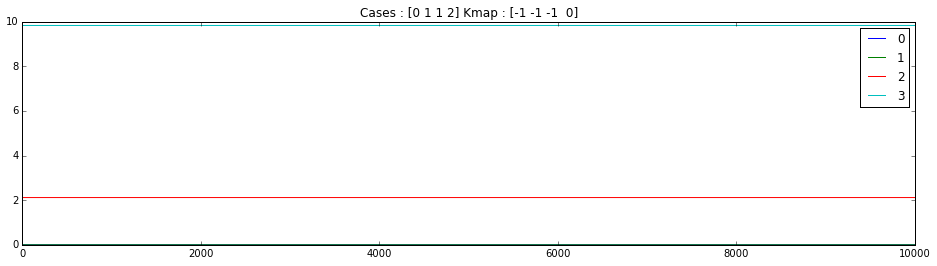

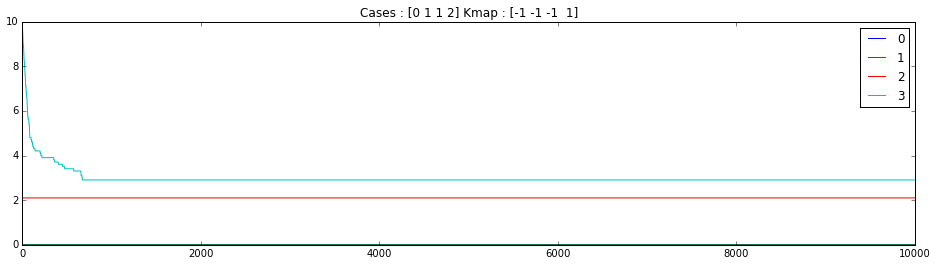

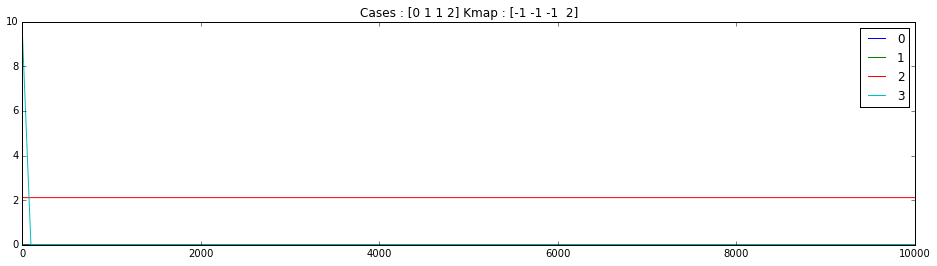

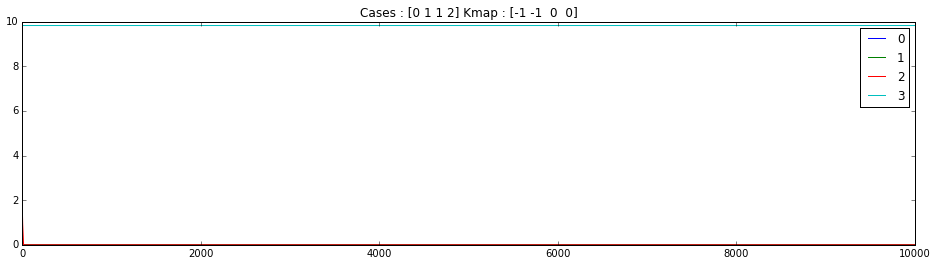

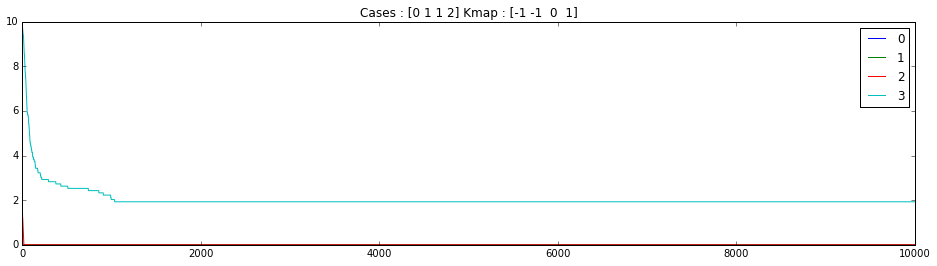

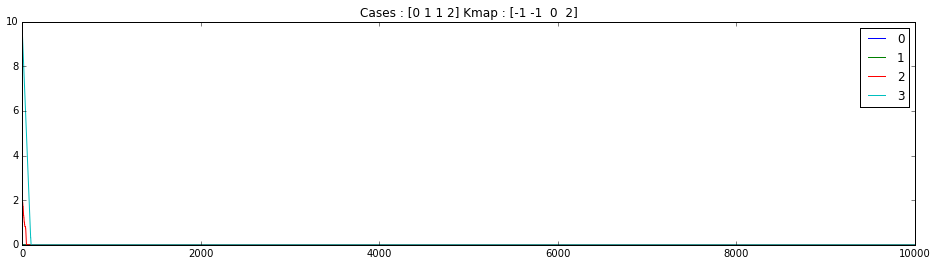

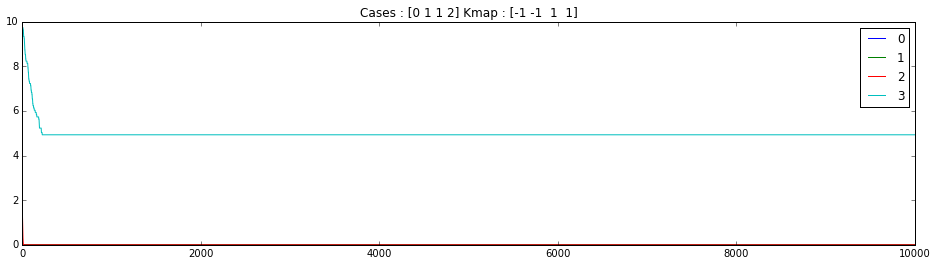

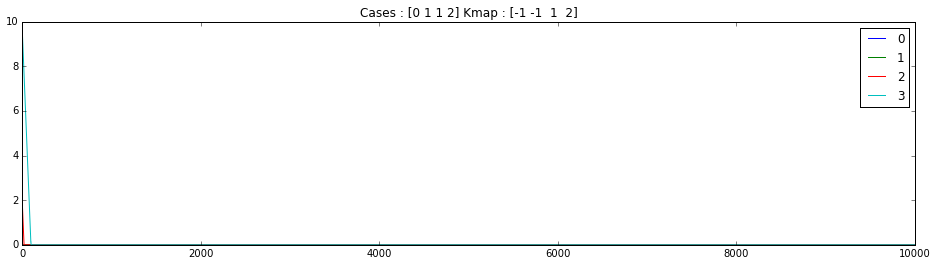

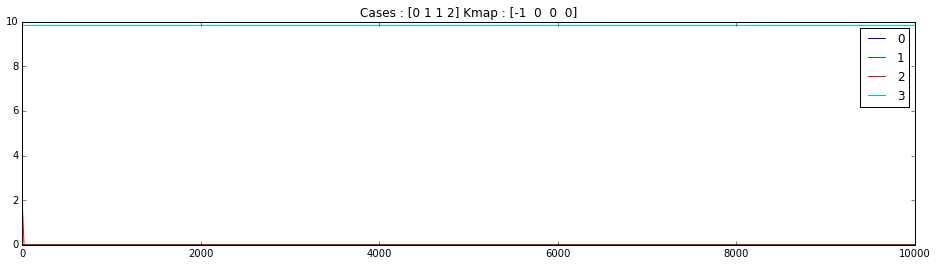

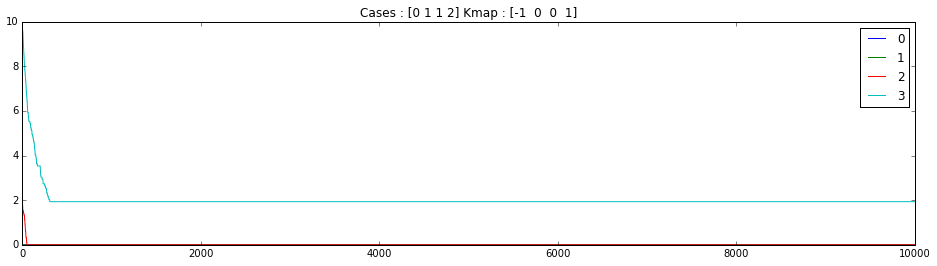

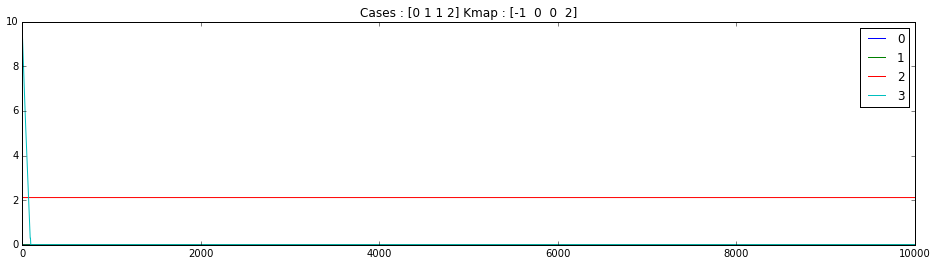

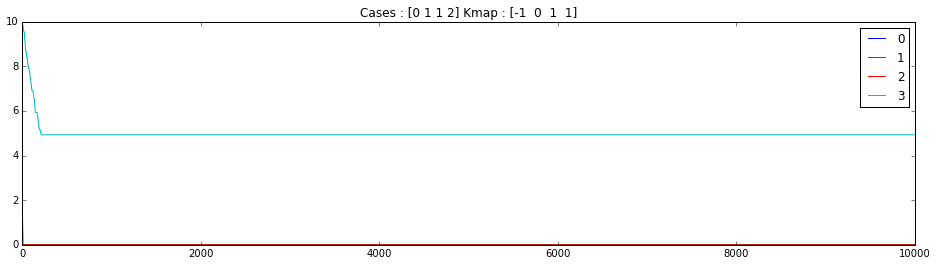

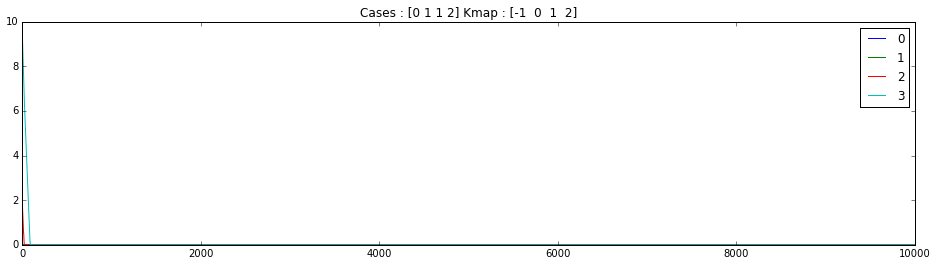

In [70]:
for i in range(len(Ks)):
    plt.figure(figsize=(16,4))
    plt.title("Cases : " + np.array2string(np.array(cases)) + " Kmap : " + np.array2string(np.array(Ks[i])))
    for n in range(WT[i].shape[1]):
        plt.plot(WT[i][:,n], label = "{0}".format(n))
    plt.legend()

In [73]:
for i in range(len(Ks)):
    print(Ks[i])
    print(base.calculate_cost(WT[i][-1],Ks[i],cases,sampler,alpha,beta,gamma,T,D,M=100000))

(-1, -1, -1, -1)
(24.745796106250001, 23.000780935000002, 1.7450151712500002, 0.0)
(-1, -1, -1, 0)
(80.553284333249991, 79.347637733999989, 1.2056465992500003, 0.0)
(-1, -1, -1, 1)
(48.166539301735718, 46.970342408335718, 1.1961968934000002, 0.0)
(-1, -1, -1, 2)
(16.396115403150002, 13.400498169000002, 2.9956172341499996, 0.0)
(-1, -1, 0, 0)
(83.40023017110002, 82.703584542000016, 0.69664562909999983, 0.0)
(-1, -1, 0, 1)
(60.739669365444961, 60.043112745444958, 0.69655661999999996, 0.0)
(-1, -1, 0, 2)
(22.523181456800003, 20.030371523000003, 2.4928099338000003, 0.0)
(-1, -1, 1, 1)
(30.398095248601265, 28.103067427801264, 2.2950278208000001, 0.0)
(-1, -1, 1, 2)
(11.455510177400001, 7.3532566760000009, 4.1022535013999999, 0.0)
(-1, 0, 0, 0)
(198.96246499999998, 189.96289999999999, 8.9995650000000005, 0.0)
(-1, 0, 0, 1)
(119.59339176879804, 110.59544676879804, 8.9979449999999996, 0.0)
(-1, 0, 0, 2)
(65.811783775878951, 55.007088775878948, 10.804694999999999, 0.0)
(-1, 0, 1, 1)
(35.6754289